In [8]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

# Faltungsoperatoren
Bitte experimentieren Sie mit den folgenden Faltungsfiltern und achten Sie auf den Einfluss des Strukturelements, dessen Größe und Inhalt.

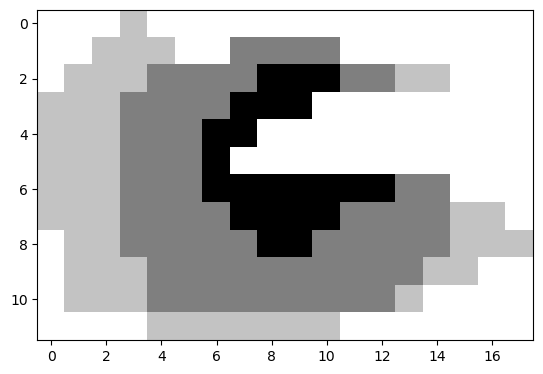

In [9]:
img = cv.imread('./img/raw_gray.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

## Mittelwertfilter

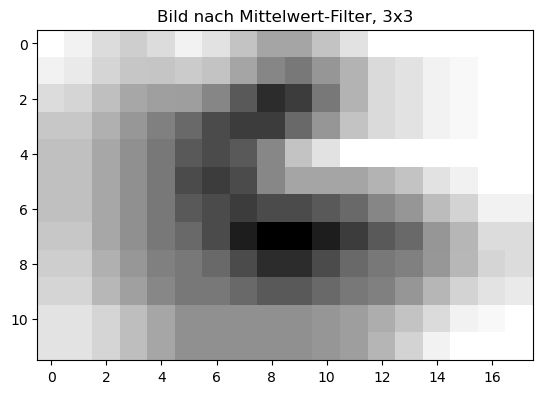

In [10]:
# Der Aufbau der Faltungsoperation mit OpenCV gestaltet sich im Folgenden immer gleich: 
# 1. definiere dene Faltungskernel
kernel = np.ones((3,3),np.float32)/9
# 2. wende Faltungskernel an (Syntax: filter2D(src, ddepth, kernel))
dst = cv.filter2D(img,-1,kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Mittelwert-Filter, 3x3')
plt.show()

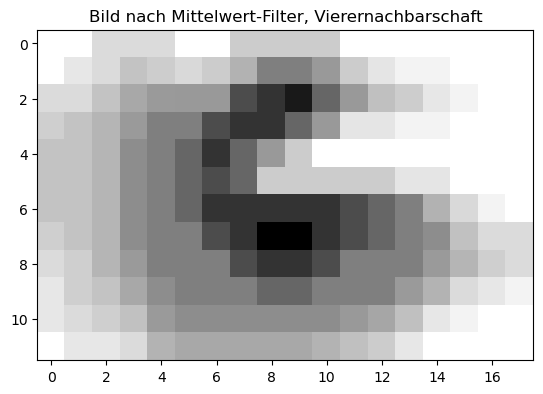

In [11]:
kernel = np.array([[0,1,0],[1,1,1],[0,1,0]],np.float32)/5
dst = cv.filter2D(img,-1,kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Mittelwert-Filter, Vierernachbarschaft')
plt.show()

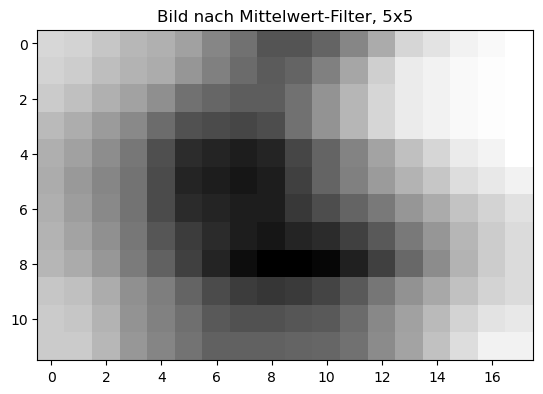

In [12]:
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Mittelwert-Filter, 5x5')
plt.show()

## Gaußscher Glättungsfilter

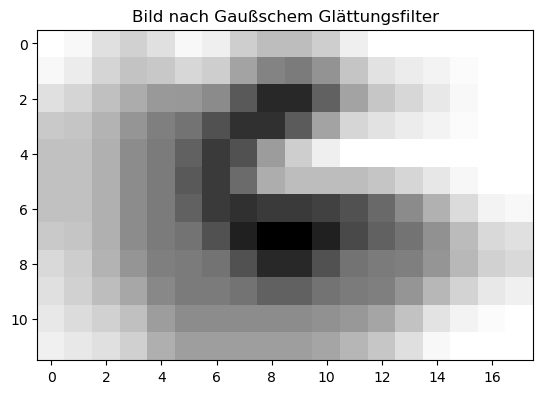

In [13]:
kernel = np.array([[1,2,1],[2,4,2],[1,2,1]],np.float32)/16
dst = cv.filter2D(img,-1,kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Gaußschem Glättungsfilter')
plt.show()

## Schärfungsfilter

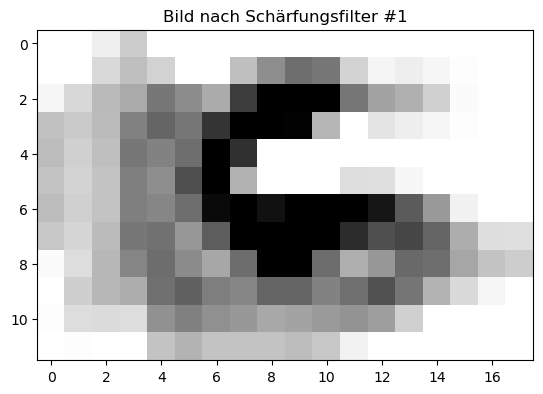

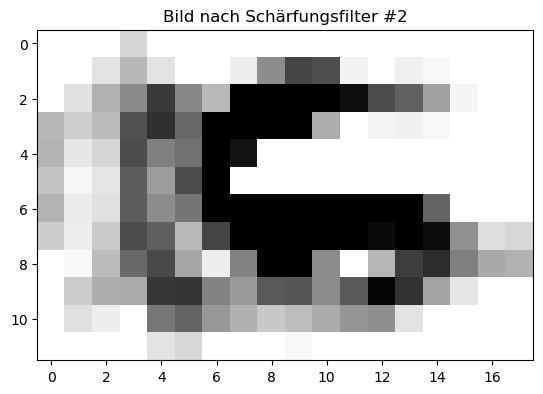

In [14]:
kernel1 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]],np.float32)
sharp1 = cv.filter2D(dst,-1,kernel1)
plt.imshow(sharp1, cmap='gray')
plt.title('Bild nach Schärfungsfilter #1')
plt.show()

kernel2 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]],np.float32)
sharp2 = cv.filter2D(dst,-1,kernel2)
plt.imshow(sharp2, cmap='gray')
plt.title('Bild nach Schärfungsfilter #2')
plt.show()

## Laplace Kantenfilter

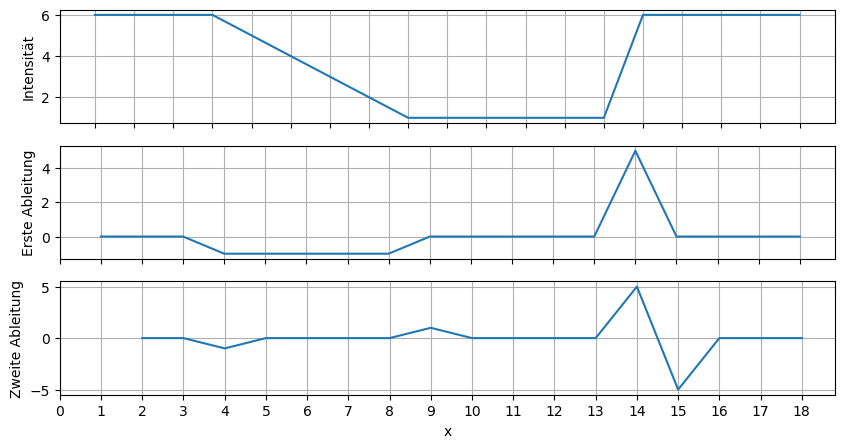

In [15]:
# Beispiel zur Illustration von Laplace-Kantenfiltern
y = np.array([6,6,6,6,5,4,3,2,1,1,1,1,1,1,6,6,6,6,6])
x = np.arange(0,y.size)
y_d = np.diff(y)    # 1. Ableitung
y_dd = np.diff(y_d) # 2. Ableitung

plt.figure(figsize=(10,5))
ax1 = plt.subplot(3,1,1)
plt.plot(x,y)
plt.xticks(x)
plt.ylabel('Intensität')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.grid(True)

ax2 = plt.subplot(3,1,2)
plt.plot(x[1:],y_d)
plt.xticks(x)
plt.ylabel('Erste Ableitung')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.grid(True)

ax3 = plt.subplot(3,1,3)
plt.plot(x[2:],y_dd)
plt.xticks(x)
plt.ylabel('Zweite Ableitung')
plt.xlabel('x')
ax3 = plt.setp(ax3.get_xticklabels(), visible=True)
plt.grid(True)


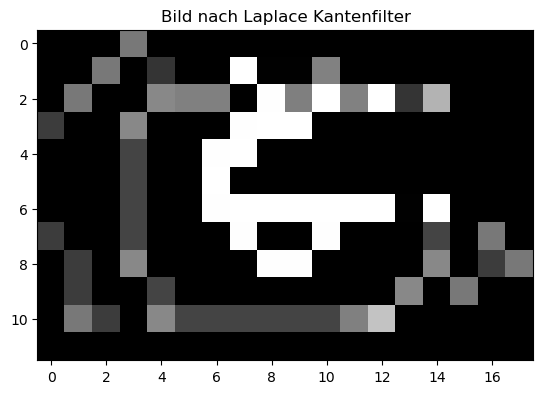

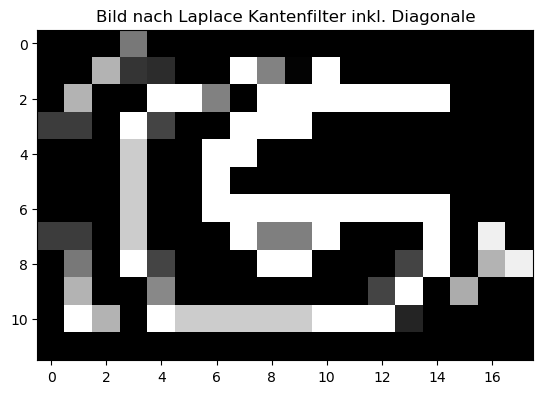

In [16]:
kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]],np.float32)
dst = cv.filter2D(img,-1,kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Laplace Kantenfilter')
plt.show()

kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]],np.float32)
dst = cv.filter2D(img,-1,kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Laplace Kantenfilter inkl. Diagonale')
plt.show()

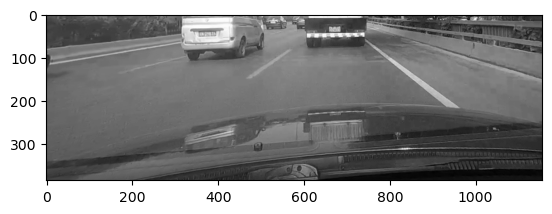

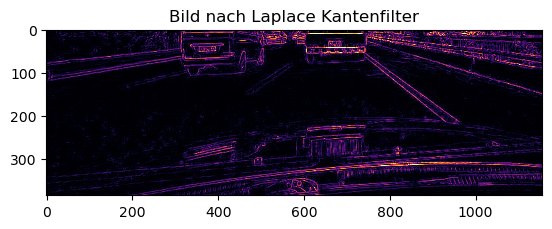

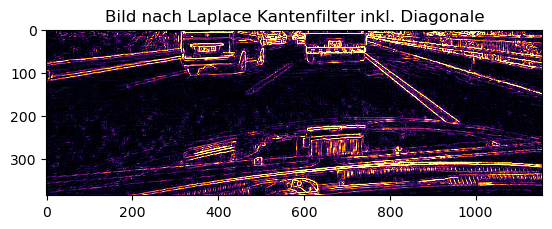

In [17]:
img_lanes = cv.imread('./img/uclanes_ex.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_lanes, cmap='gray')
plt.show()

kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]],np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=50) # ACHTUNG: hier wurde der Anzeigeraum zur Visualisierung angepasst
plt.title('Bild nach Laplace Kantenfilter')
plt.show()

kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]],np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=50)
plt.title('Bild nach Laplace Kantenfilter inkl. Diagonale')
plt.show()

## Sobel Kantenfilter

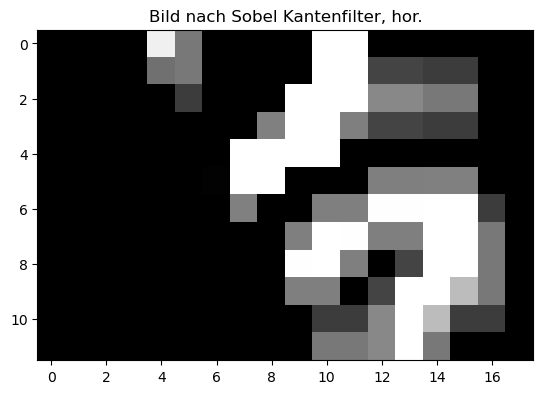

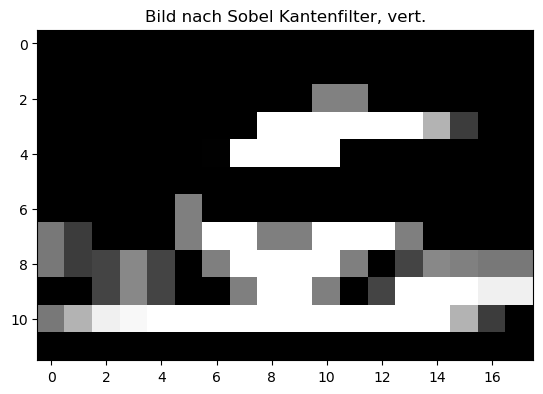

In [18]:
kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32)
dst = cv.filter2D(img,-1,kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Sobel Kantenfilter, hor.')
plt.show()

kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],np.float32)
dst = cv.filter2D(img,-1,kernel)
plt.imshow(dst, cmap='gray')
plt.title('Bild nach Sobel Kantenfilter, vert.')
plt.show()

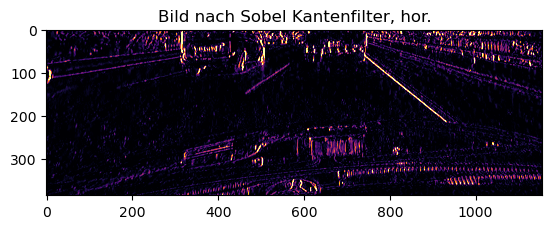

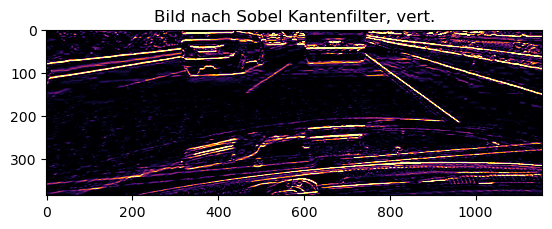

In [19]:
kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=100)
plt.title('Bild nach Sobel Kantenfilter, hor.')
plt.show()

kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno',vmin=0, vmax=100)
plt.title('Bild nach Sobel Kantenfilter, vert.')
plt.show()

## Prewitt Kantenfilter

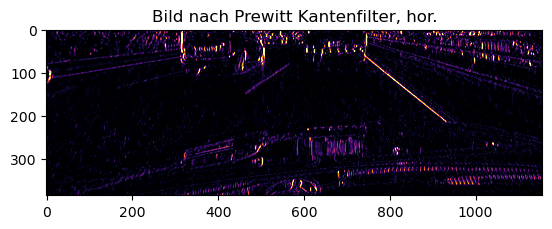

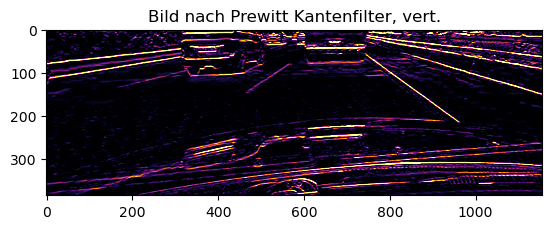

In [20]:
kernel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno',vmin=0, vmax=100)
plt.title('Bild nach Prewitt Kantenfilter, hor.')
plt.show()

kernel = np.array([[-1,-1,-1],[0,0,0],[1,1,1]],np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=100)
plt.title('Bild nach Prewitt Kantenfilter, vert.')
plt.show()

## Simpler Kantenfilter

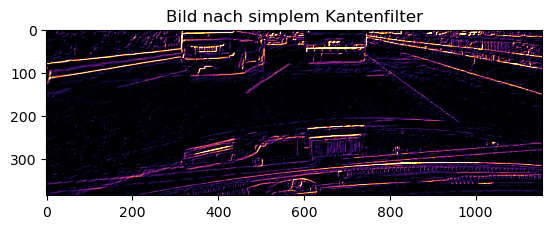

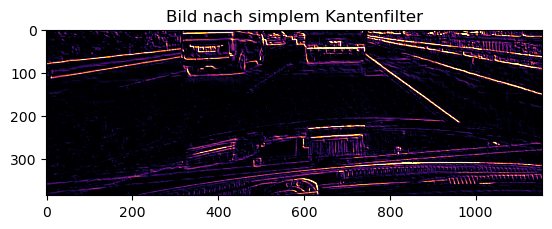

In [21]:
kernel = np.array([[-1,0,0],[0,0,0],[0,0,1]],np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno',vmin=0, vmax=50)
plt.title('Bild nach simplem Kantenfilter')
plt.show()

kernel = np.array([[0,0,-1],[0,0,0],[1,0,0]],np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=50)
plt.title('Bild nach simplem Kantenfilter')
plt.show()

## Relieffilter

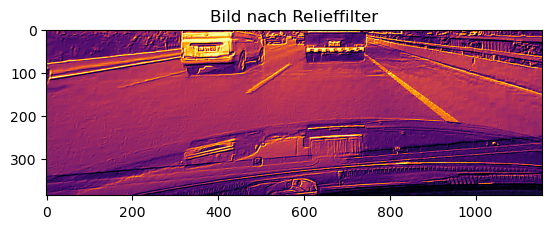

In [22]:
kernel = np.array([[-2,-1,0],[-1,1,1],[0,1,2]],np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno')
plt.title('Bild nach Relieffilter')
plt.show()

# Aufgaben
1. Welchen Einfluss hat die Filtergröße auf die Faltung? 
2. Welchen Einfluss hat der gewählte Ursprung des Filterelements?
3. Wie können Sie die Faltungsoperatoren für die Spurerkennung nutzen? Wenden Sie diese an.

### Lösungen
1. Je größer die Filterung, desto unschärfer wird das Bild
2. Der Ursprung des Filters sagt in gewisser weise aus, welche Linien wie stark gefiltert werden. Also ob horizontal oder vertikal usw
3. Man könnte nach Linien mit einem bestimmten Winkel filtern. 

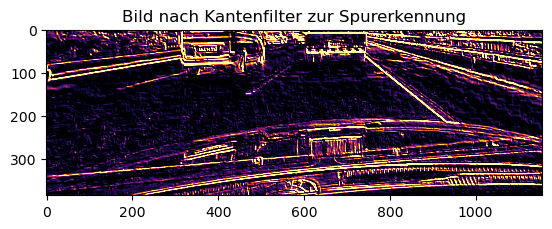

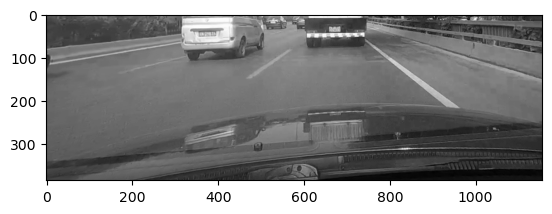

In [57]:
# Anwendung zu Aufgabe 3
img_lanes =cv.imread('./img/uclanes_ex.jpg', cv.IMREAD_GRAYSCALE)

kernel = np.array([ [0,1,2],
                    [-1,0,1],
                    [-2,-1,0]],
                np.float32)
dst = cv.filter2D(img_lanes,-1,kernel)
plt.imshow(dst, cmap='inferno', vmin=0, vmax=50)
plt.title('Bild nach Kantenfilter zur Spurerkennung')
plt.show()

plt.figure()
plt.imshow(img_lanes, cmap='gray')
plt.show()
